In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, precision_recall_fscore_support

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, Activation
from keras.utils import to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam



Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/german_credit.csv')

In [3]:
data.shape

(1000, 21)

In [4]:
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
data.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [6]:
data['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [7]:
data.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [116]:
X = data[['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']]
y = data['Creditability']

In [107]:
# 데이터 컬럼 순서 변경 테스트
# X = data[[ 'Duration of Credit (month)',
#        'Payment Status of Previous Credit','Occupation', 'Purpose', 
#         'Length of current employment', 'Most valuable available asset',
#        'Instalment per cent', 'Sex & Marital Status', 'Guarantors','Credit Amount',
#        'Duration in Current address','Value Savings/Stocks',
#        'Age (years)', 'Concurrent Credits', 'Type of apartment',
#        'No of Credits at this Bank',  'No of dependents',
#        'Telephone','Account Balance', 'Foreign Worker']]

In [117]:
X.dtypes

Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

In [118]:
X.describe()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [119]:
input_shape = (X.shape[1],)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X),np.asarray(y), test_size=0.3, shuffle=True)

In [121]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
cnn_X_train = X_train.reshape(700,20,1)
cnn_X_test = X_test.reshape(300,20,1)

In [123]:
tmp = to_categorical(y_train, 2)
tmp

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [124]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=5) 

In [163]:
def anal_cnn():
    
    model = Sequential()
#     model.add(Conv1D(256, (6), padding='same', input_shape=(X.shape[1], 1), activation='relu'))
    model.add(Conv1D(8, (4), padding='valid', input_shape=(X.shape[1], 1), activation='relu'))
#     model.add(MaxPool1D(pool_size=(2)))
    model.add(Conv1D(4, (4), padding='valid', activation='relu'))
#     model.add(MaxPool1D(pool_size=(2)))
    model.add(Conv1D(2, (2), padding='valid',  activation='relu'))
#     model.add(MaxPool1D(pool_size=(2)))
#     model.add(Conv1D(8, (2), padding='same', input_shape=(X.shape[1], 1), activation='relu'))
    # model.add(Conv1D(32, (6),  activation='relu'))
    # model.add(MaxPool1D(pool_size=(2)))
    # model.add(Dropout(0.25))
    # model.add(Conv1D(64, (4), padding='same', activation='relu'))
    # model.add(MaxPool1D(pool_size=(2)))
    # model.add(Dropout(0.25))
    # model.add(Conv1D(64, (5), padding='same', activation='relu'))

    model.add(Flatten())
    # model.add(Dense(32, activation='relu'))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=binary_crossentropy,
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['accuracy'])
    
    print("------model summary--------")
    print(model.summary())
    
    history = model.fit(cnn_X_train,
                 y_train,
                 batch_size=64,
                 epochs=3000, 
                 verbose=0,
                 validation_split=0.3,
                 )
    
    # callbacks=[earlystop]
    
    #make chart   
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    

    y_pred = model.predict_classes(cnn_X_test)
    print(classification_report(y_test, y_pred))
    
    
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.figure()
    plt.plot(fpr, tpr, label='CNN (area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CNN ROC Curve')
    plt.legend(loc='lower right')
    plt.savefig('Log_ROC')
    plt.show()

------model summary--------
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_97 (Conv1D)           (None, 17, 8)             40        
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 14, 4)             132       
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 13, 2)             18        
_________________________________________________________________
flatten_49 (Flatten)         (None, 26)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 27        
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
None


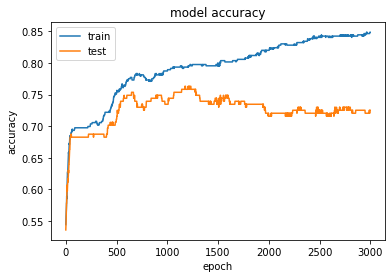

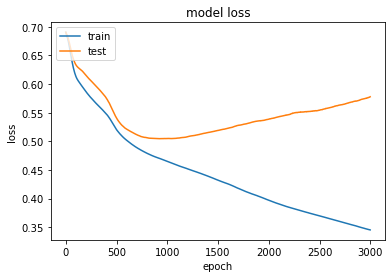

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        85
           1       0.79      0.82      0.81       215

    accuracy                           0.72       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.71      0.72      0.71       300



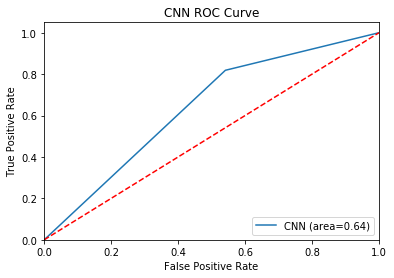

In [164]:
anal_cnn()

In [188]:
def anal_dnn():
    
    model2 = Sequential()
#     model2.add(Dense(units=int(X_train.shape[1]/2), input_dim=X_train.shape[1], activation='relu'))
#     model2.add(Dense(units=int(X_train.shape[1]/4), activation='relu'))
    model2.add(Dense(units=6, input_dim=X_train.shape[1], activation='relu'))
#     model2.add(Dense(units=6,  activation='relu'))
#     model2.add(Dense(units=8, input_dim=X_train.shape[1], activation='relu'))
    # model2.add(Dense(units=16, activation='relu'))
    model2.add(Dense(units=1, activation='sigmoid'))

    model2.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
    history2 = model2.fit(X_train, y_train, 
                      validation_split=0.3, 
                      epochs=1000, 
                      batch_size=8, 
                      verbose=0)
    
    y_pred2 = model2.predict_classes(X_test)
    print(classification_report(y_test, y_pred2))
    
    plt.plot(history2.history['accuracy'])
    plt.plot(history2.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history2.history['loss'])
    plt.plot(history2.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    roc_auc = roc_auc_score(y_test, y_pred2)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

    plt.figure()
    plt.plot(fpr, tpr, label='DNN (area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('DNN ROC Curve')
    plt.legend(loc='lower right')
    plt.savefig('Log_ROC')
    plt.show()

              precision    recall  f1-score   support

           0       0.49      0.55      0.52        85
           1       0.81      0.77      0.79       215

    accuracy                           0.71       300
   macro avg       0.65      0.66      0.66       300
weighted avg       0.72      0.71      0.72       300



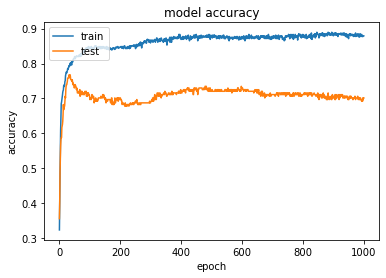

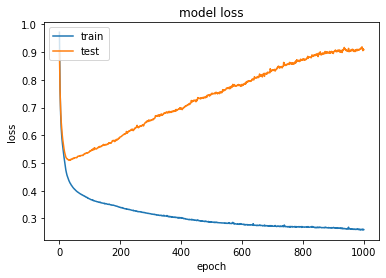

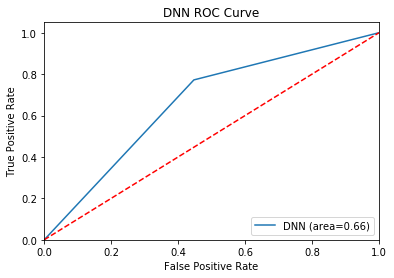

In [189]:
anal_dnn()